## Libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanAbsoluteError,MeanSquaredError,Huber
from tensorflow.keras.metrics import RootMeanSquaredError

In [2]:
tf.__version__

'2.10.0'

In [3]:
# Generate some random data for regression
np.random.seed(0)
sX = np.random.rand(100, 1)
sy = 2 * sX + 1 + 0.1 * np.random.randn(100, 1)
print(sX.shape)
print(sy.shape)

(100, 1)
(100, 1)


In [4]:
# Define the TensorFlow model
samll_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Input layer
    tf.keras.layers.Dense(1)  # Output layer with a single neuron
])
samll_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=0.1)  # You can adjust the delta parameter as needed
samll_model.compile(optimizer='sgd', loss=huber_loss)

In [6]:
# Train the model
history = samll_model.fit(sX, sy, epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 2ms/step - loss: 0.1213
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1208
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1203
Epoch 4/100
4/4 [==============================] - 0s 1000us/step - loss: 0.1198
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1193
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1188
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1184
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1179
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1174
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1169
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1164
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1159
Epoch 13/100
4/4 [==============================] - 0s 1ms

In [7]:
# Make predictions
predictions = samll_model.predict(sX)
print(predictions[:5])

4/4 [==============================] - 0s 667us/step
[[1.3174608]
 [1.5955946]
 [1.4076498]
 [1.3108904]
 [1.1082306]]


In [8]:
# Evaluate the model
mse = tf.keras.losses.mean_squared_error(sy, predictions).numpy()
mae = tf.keras.losses.mean_absolute_error(sy, predictions).numpy()
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: [0.44043297 0.8553784  0.7130845  0.39093947 0.788374   1.0032523
 0.7422353  0.76520574 0.65493053 0.691098   0.6717303  0.80258644
 0.6517444  1.003043   0.4342256  0.48896703 0.3692858  1.106538
 0.7536778  0.8571208  1.2311625  0.5293634  0.38993493 0.90853953
 0.27197933 1.0088936  0.36687216 0.6978467  0.92854065 0.7817714
 0.7631874  0.8925937  0.44039688 0.95572853 0.33566913 0.77969766
 0.80221695 0.61941284 0.9432748  0.8391484  0.57102716 0.4013609
 0.7376131  0.5661224  0.561647   0.6483395  0.39131358 0.6843457
 0.59410167 0.5778232  0.504376   0.6366613  0.73450357 0.40536645
 0.36600938 0.51926386 0.7604942  0.4386708  0.62834597 0.32596746
 0.25307187 0.46263772 0.69243866 0.502493   0.8151384  0.66503155
 0.60565    0.5529107  0.55277985 0.34268197 0.8349019  0.8559668
 0.7160161  0.51253664 0.69362557 0.29868227 0.64883846 0.28245676
 0.3392733  0.35425785 0.42848277 0.86294645 0.51265895 0.69903266
 0.44018203 0.59530485 0.45125073 0.22692199 0.82

![Losses](images/losses.jpeg)

## Loss

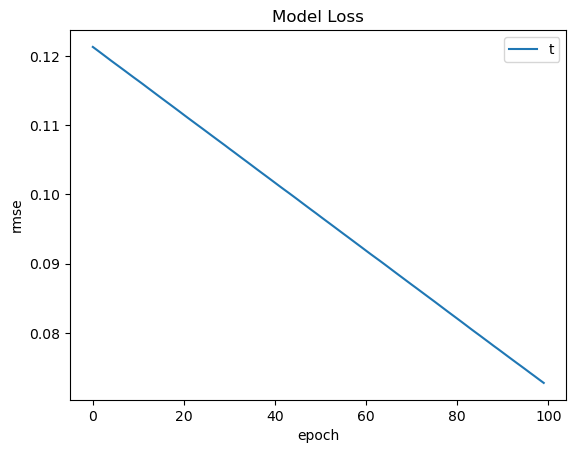

In [9]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend('train')
plt.show()